In [8]:
!pip install datadotworld
!pip install datadotworld[pandas]

     |████████████████████████████████| 163kB 4.8MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 174kB 42.9MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 245kB 41.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241262 sha256=ff723ebd7dbcb4ad26c761a7074f03720301d5f2d5df861aff81948a227289ff
  Stored in directory: /root/.cache/pip/wheels/b5/85/ca/e768ac132e57e75e645a151f8badac71cc0089e7225dddf76b
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10768 sha256=0c47c9f663775904a2eb13285e0a645b7367751a07a489b85fe3d753916e46fc
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw
from io import *

In [0]:
#!dw configure

In [12]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [14]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')
df = data.dataframes['7004_1']
df.sample(5)

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


ImportError: ignored

                         id asins        brand  ...  vin websiteids  weight
8132   AVpe4lqcLJeJML43xdQV   NaN  Dr. Martens  ...  NaN        NaN     NaN
8594   AVpfG3r4ilAPnD_xVGMU   NaN      DOCKERS  ...  NaN        NaN     NaN
784    AVpe6r2filAPnD_xQ0ZJ   NaN    J.D. Fisk  ...  NaN        NaN     NaN
16527  AVpfm0rL1cnluZ0-n4vh   NaN        Bally  ...  NaN        NaN     NaN
15040  AVpfh4y-LJeJML43-1y_   NaN     Isotoner  ...  NaN        NaN     NaN

[5 rows x 48 columns]

id asins            brand  ...  vin websiteids  weight
3765  AVpfNfMBLJeJML434uir   NaN  Unique Bargains  ...  NaN        NaN     NaN
1678  AVpfUGikLJeJML4364kW   NaN            Scott  ...  NaN        NaN     NaN
4920  AVpfHFPKilAPnD_xVKvI   NaN             PUMA  ...  NaN        NaN     NaN
9610  AVpe40M5LJeJML43xi6C   NaN             VANS  ...  NaN        NaN     NaN
7395  AVpe6KPc1cnluZ0-Zk5_   NaN             Nike  ...  NaN        NaN     NaN

[5 rows x 48 columns]

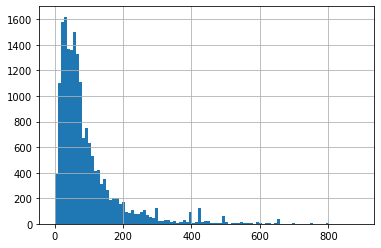

In [15]:
df_usd = df[df.prices_currency == 'USD'].copy()
df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
df_usd_filter = df_usd[df_usd['prices_amountmin'] < filter_max]
df_usd_filter.prices_amountmin.hist(bins=100)

In [0]:
df =df_usd_filter

# Model building


In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [25]:
df.shape

(18280, 48)

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [30]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [31]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

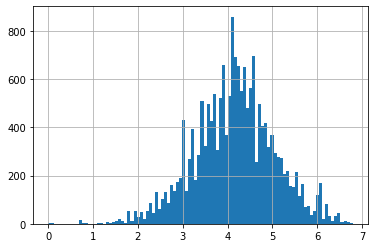

In [34]:
np.log1p(df.prices_amountmin).hist(bins=100)

In [35]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [36]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [37]:
df.brand.value_counts()

Nike                   1709
PUMA                    574
Ralph Lauren            524
New Balance             361
VANS                    356
                       ... 
RYAN SEACREST             1
HyTest by Wolverine       1
New Era                   1
Urban Pipeline            1
Cufflink Aficionado       1
Name: brand, Length: 1856, dtype: int64

In [56]:
df['brand_cat'] = df['brand'].factorize()[0]
df['man_cat'] = df['manufacturer'].factorize()[0]
df['feature_cat'] = df['features'].factorize()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
 def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [55]:
run_model(['brand_cat', 'feature_cat'])

(-58.146106797111734, 4.650059633901864)

In [0]:
#!pip install eli5

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

from ast import literal_eval
from tqdm import tqdm_notebook

In [24]:
def parse_features(x):
  output_dict = {}
  if str(x) == 'nan': return output_dict

  features = literal_eval(x.replace('\\"', '"'))
  for item in features:
    key = item['key'].lower().strip()
    value = item['value'][0].lower().strip()
    output_dict[key] = value
  return output_dict

df['features_parsed'] = df['features'].map(parse_features)
df['features_parsed'].head().values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array([{'gender': 'men', 'shoe size': 'm', 'shoe category': "men's shoes", 'color': 'multicolor', 'manufacturer part number': '8190-w-navy-7.5', 'brand': 'josmo'},
       {'gender': 'men', 'shoe size': 'm', 'shoe category': "men's shoes", 'color': 'multicolor', 'manufacturer part number': '8190-w-navy-7.5', 'brand': 'josmo'},
       {'gender': 'men', 'color': 'black', 'shipping weight (in pounds)': '0.45', 'condition': 'new', 'brand': 'servus by honeywell', 'manufacturer_part_number': 'zsr101blmlg'},
       {'gender': 'men', 'color': 'black', 'shipping weight (in pounds)': '0.45', 'condition': 'new', 'brand': 'servus by honeywell', 'manufacturer_part_number': 'zsr101blmlg'},
       {'gender': 'men', 'color': 'black', 'shipping weight (in pounds)': '0.45', 'condition': 'new', 'brand': 'servus by honeywell', 'manufacturer_part_number': 'zsr101blmlg'}],
      dtype=object)

In [27]:
keys = set()
df['features_parsed'].map(lambda x: keys.update(x.keys()))

def get_name_feat(key):
  return 'feat_' + key

for key in tqdm_notebook(keys):
  df[get_name_feat(key)] = df.features_parsed.map(lambda feats: feats[key] if key in feats else np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df['brand_cat']=df['brand'].map(lambda x: str(x).lower()).factorize()[0]
df['feat_brand_cat']=df['feat_brand'].factorize()[0]
df['feat_color_cat']=df['feat_color'].factorize()[0]
df['feat_gender_cat']=df['feat_gender'].factorize()[0]
df['feat_manufacturer part number_cat']=df['feat_manufacturer part number'].factorize()[0]
df['feat_material_cat']=df['feat_material'].factorize()[0]

df['feat_sport_cat']=df['feat_sport'].factorize()[0]
df['feat_style_cat']=df['feat_style'].factorize()[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
def run_model(feats, model = DecisionTreeRegressor(max_depth=5)):
  x = df[feats].values
  y = df['prices_amountmin'].values

  scores = cross_val_score(model, x, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
feats = ['brand_cat', 'feat_material_cat', 'feat_brand_cat']

In [0]:
model = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0)
result = run_model(feats,model)

In [57]:
x = df[feats].values
y = df['prices_amountmin'].values
m = RandomForestRegressor(max_depth=5, n_estimators=100,random_state=0)
m.fit(x,y)

print(result)
perm = PermutationImportance(m, random_state=1).fit(x,y)
eli5.show_weights(perm,feature_names=feats)

(-57.012733213315144, 4.032749999963249)


In [58]:
cd /content/drive/My Drive/Colab Notebooks/dw_matrix/

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [59]:
cd matrix_one

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_one


In [0]:
!git add day5.ipynb

In [63]:
!git commit -m "Random forest classifier"

[master 099f936] Random forest classifier
 1 file changed, 1 insertion(+)
 create mode 100644 matrix_one/day5.ipynb


In [66]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 24.40 KiB | 4.88 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
To https://gitlab.com/Deutschman/dw_matrix.git
   0bc18fc..099f936  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
fatal: could not read Password for 'https://soXbEzp8R7GJbEZwx4xs@gitlab.com': No such device or address
